# Time Series Forecasting Tutorial

This notebook introduces you on how you can forecast time series data.


In [3]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, TimeSeriesSplit
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

### 1. Step: Load the Datasets

In [4]:
DATA_URL = "https://gist.githubusercontent.com/marcus-voss/b5fcbc82adff8f227fe8e8ee126c5f87/raw/b4b7d89425d5e7a60bec95d347b7139476603216/load_data.csv"
data = pd.read_csv(DATA_URL, parse_dates=[0], index_col=0)
data.head()

,load,temperature
date,,
2015-01-01 00:00:00-06:00,6.378,3.22
2015-01-01 01:00:00-06:00,6.134,3.33
2015-01-01 02:00:00-06:00,6.420,3.14
2015-01-01 03:00:00-06:00,6.129,2.69
2015-01-01 04:00:00-06:00,6.687,2.53


#### You can see, that the Dataset consists of data between 2015 and 2017

In [5]:
data.index

DatetimeIndex(['2015-01-01 00:00:00-06:00', '2015-01-01 01:00:00-06:00',
               '2015-01-01 02:00:00-06:00', '2015-01-01 03:00:00-06:00',
               '2015-01-01 04:00:00-06:00', '2015-01-01 05:00:00-06:00',
               '2015-01-01 06:00:00-06:00', '2015-01-01 07:00:00-06:00',
               '2015-01-01 08:00:00-06:00', '2015-01-01 09:00:00-06:00',
               ...
               '2016-12-31 14:00:00-06:00', '2016-12-31 15:00:00-06:00',
               '2016-12-31 16:00:00-06:00', '2016-12-31 17:00:00-06:00',
               '2016-12-31 18:00:00-06:00', '2016-12-31 19:00:00-06:00',
               '2016-12-31 20:00:00-06:00', '2016-12-31 21:00:00-06:00',
               '2016-12-31 22:00:00-06:00', '2016-12-31 23:00:00-06:00'],
              dtype='datetime64[ns, UTC-06:00]', name='date', length=17544, freq=None)

### 2. Step: Data Visualization
In comparison to the prior example, it is visible that one characteristic of time series data is that it is continuous.

TIPP: It is important to check if the measured time series is regular (continuous in the same pattern (i.e. every 10sec)). Most time series data is collected via sensors (which can have some outages/irregular measurement times), which can also lead to an uneven time-wise distribution. 

Furthermore, sometimes there is a mismatch in the recorded time resolution and the wanted one. Pandas provides many useful functions to *aggregate* data points to lower resolution or *interpolate* data to a higher resolution (see [their overview here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)). 

#### TASK: Please write the code to be in a time resolution of one day (using mean and plot it)

### 3. Step: Data Analysis


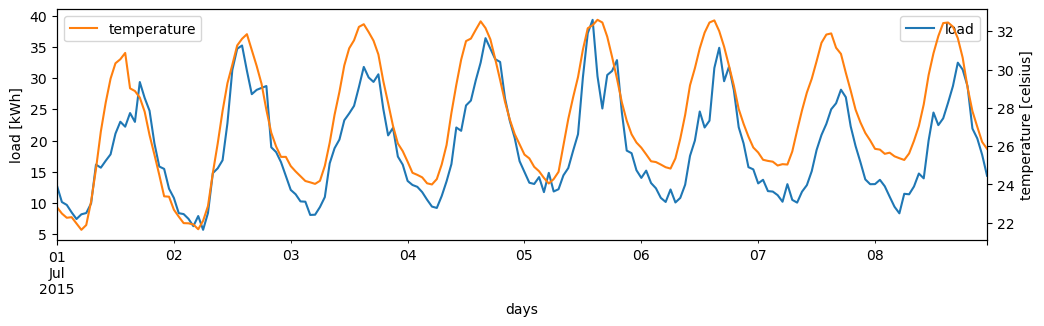

In [5]:
ax = data["2015-07-01":"2015-07-08"].load.plot(figsize=(12,3),label='load')
ax2 = ax.twinx()
data["2015-07-01":"2015-07-08"].temperature.plot(ax=ax2, color="C1",label='temperature')
handles, labels = ax.get_legend_handles_labels()
plt.legend()
ax.legend(handles=handles, labels=labels)
ax2.set_ylabel('temperature [celsius]')
ax.set_ylabel('load [kWh]')
ax.set_xlabel('days');

#### An important factor in time series prediction is the correlation between the different time series: What can you already see in this plot?

The regular pattern also may hint at autocorrelation (read more on autocorrelation for instance [here](https://otexts.com/fpp3/acf.html#acf)). Let's further investigate these relationships:

<Axes: xlabel='date'>

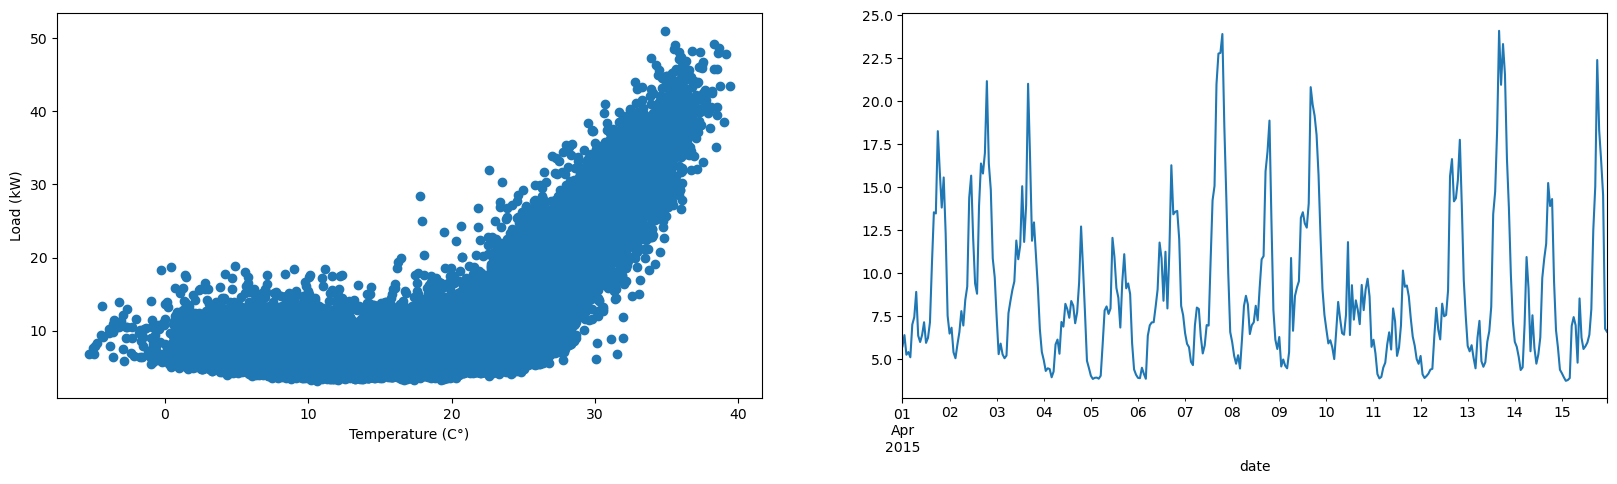

In [6]:
data = pd.read_csv(DATA_URL, parse_dates=[0], index_col=0)

fig, ax = plt.subplots(1,2, figsize=(20,5));
ax[0].scatter(data.temperature, data.load)
ax[0].set_xlabel("Temperature (C°)")
ax[0].set_ylabel("Load (kW)")

data["2015-04-01":"2015-04-15"].load.plot(ax=ax[1])

#### Q: What can we interpret out of these plots?

These are some of the most frequent time series:

![alt text](img/sorts_timeseries2.png "Title")

### 4. Step: Generating the Testing and Training Datasets

#### TASK:  Please split the dataset into X_train, X_test, y_train, y_test using the train_test_split function

In [7]:
X, Y = data, data['load']

### 5. Step Defining and Compile a LSTM Model using TensorFlow
Finally, we use a simple artificial neural network using Tensorflow. A second popular deep learning library is [PyTorch](https://pytorch.org/). Both are powerful and a preference mostly a matter of taste. There are different ways to model ANN in Tensorflow. For simple archicture, for instance of multiple fully-connected leayers the easiest ist the [Keras Sequential API](https://www.tensorflow.org/guide/keras/sequential_model).

The `summary()` function shows us the architecture and number of trainable parameters (weights).

#### TASK:  Please define a normal LSTM Model

It should have the following attributes:
- X_train as an input
- Two LSTM Layer
- One output (Dense Layer)
You can find information here: [LSTM](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) or here: [Tensorflow](https://www.tensorflow.org/tutorials/structured_data/time_series)
After you defined it, please also compile it.

In [ ]:
# Define the LSTM model


# Compile the model


# Print the model summary
model.summary()

### 6. Step Fitting a LSTM Model

#### TASK:  Please fit the model. 
You can find information here: [Tensorflow](https://www.tensorflow.org/tutorials/structured_data/time_series)

Q: What would you do, if the training takes too long or you see overfitting?

#### You can see how well the model performs with the following code:

In [ ]:
y_hat = pd.DataFrame(model.predict(X_test), index=y_test.index)
print(f"MAPE: {mape(y_test, y_hat):.2f}")

fig, ax = plt.subplots()
ax.plot(y_test[y_test.index.hour==0].iloc[:170].values.reshape(-1,1),label='ground truth')
ax.plot(y_hat[y_hat.index.hour==0].iloc[:170].values.reshape(-1,1),label='Stock LSTM')
ax.set_ylabel('load [kWh]')
ax.set_xlabel('hours')
plt.legend()

### 7. How can we improve it?

Bi-Directional LSTM have proven in the literature to be really effective for time series prediction!

#### Task: Please change your LSTM model to a Bi-Directional Model